# Features Engineering - Math

Mathematical features are essential components in quantitative trading, providing objective measures of price movements, volatility, and market dynamics. By leveraging mathematical transformations and indicators, traders can extract meaningful patterns and improve the predictive power of their models. In this notebook, we will implement key **math-based features** using the `quantreo` package to enhance data preprocessing and model performance.

In [1]:
# Import the Features Engineering Package from Quantreo
import quantreo.features_engineering as fe

# Import numpy
import numpy as np

# To display the graphics
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [2]:
# Import a dataset to test the functions and create new ones easily
from quantreo.datasets import load_generated_ohlcv
df = load_generated_ohlcv()
df = df.loc["2016"]

# Create a returns column
df["returns"] = df["close"].pct_change(1)

# Show the data
df

,open,high,low,close,volume,returns
time,,,,,,
2016-01-04 00:00:00,104.944241,105.312073,104.929735,105.232289,576.805768,NaN
2016-01-04 04:00:00,105.233361,105.252139,105.047564,105.149357,485.696723,-0.000788
2016-01-04 08:00:00,105.159851,105.384745,105.141110,105.330306,403.969745,0.001721
2016-01-04 12:00:00,105.330306,105.505799,104.894155,104.923404,1436.917324,-0.003863
2016-01-04 16:00:00,104.914147,105.023293,104.913252,105.014347,1177.672605,0.000867
...,...,...,...,...,...,...
2016-12-30 04:00:00,103.632257,103.711884,103.495896,103.564574,563.932484,-0.000670
2016-12-30 08:00:00,103.564574,103.629321,103.555581,103.616731,697.707475,0.000504
2016-12-30 12:00:00,103.615791,103.628165,103.496810,103.515847,1768.926665,-0.000974


<br>

## **Derivatives**

The `derivatives` function computes the **first and second derivatives** of a given price series, representing **velocity** (rate of change) and **acceleration** (rate of velocity change), respectively. These metrics are essential for understanding **price momentum** and **curvature** in financial time series.

Given a price series $P_t$:

- **First derivative (Velocity):**  Measures the rate of change of the price over time. 
  
$$v_t = \frac{P_{t} - P_{t-1}}{\Delta t}$$

- **Second derivative (Acceleration):**  Captures the curvature, indicating whether the momentum is **increasing or decreasing**.

  
$$a_t = \frac{v_t - v_{t-1}}{\Delta t} = \frac{P_{t} - 2P_{t-1} + P_{t-2}}{\Delta t^2}$$


In [3]:
df["velocity"], df["acceleration"] = fe.math.derivatives(df=df, col="close")
df[["velocity", "acceleration"]]

,velocity,acceleration
time,,
2016-01-04 00:00:00,0.000000,0.000000
2016-01-04 04:00:00,-0.082932,-0.082932
2016-01-04 08:00:00,0.180949,0.263881
2016-01-04 12:00:00,-0.406903,-0.587852
2016-01-04 16:00:00,0.090943,0.497845
...,...,...
2016-12-30 04:00:00,-0.069464,-0.080966
2016-12-30 08:00:00,0.052157,0.121621
2016-12-30 12:00:00,-0.100885,-0.153042


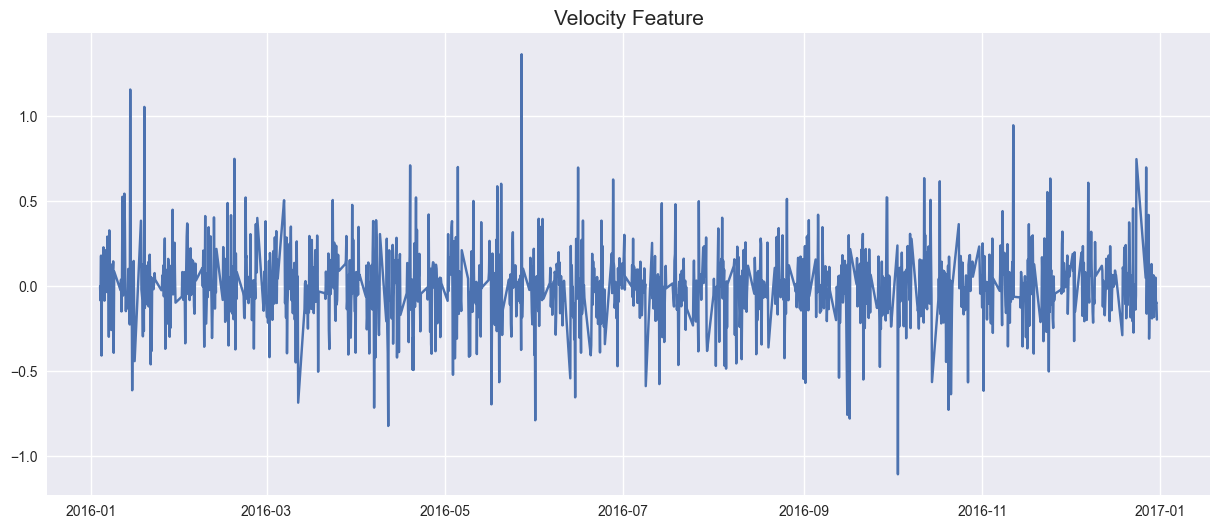

In [4]:
plt.figure(figsize=(15,6))
plt.plot(df["velocity"])
plt.title("Velocity Feature", size=15)
plt.show()

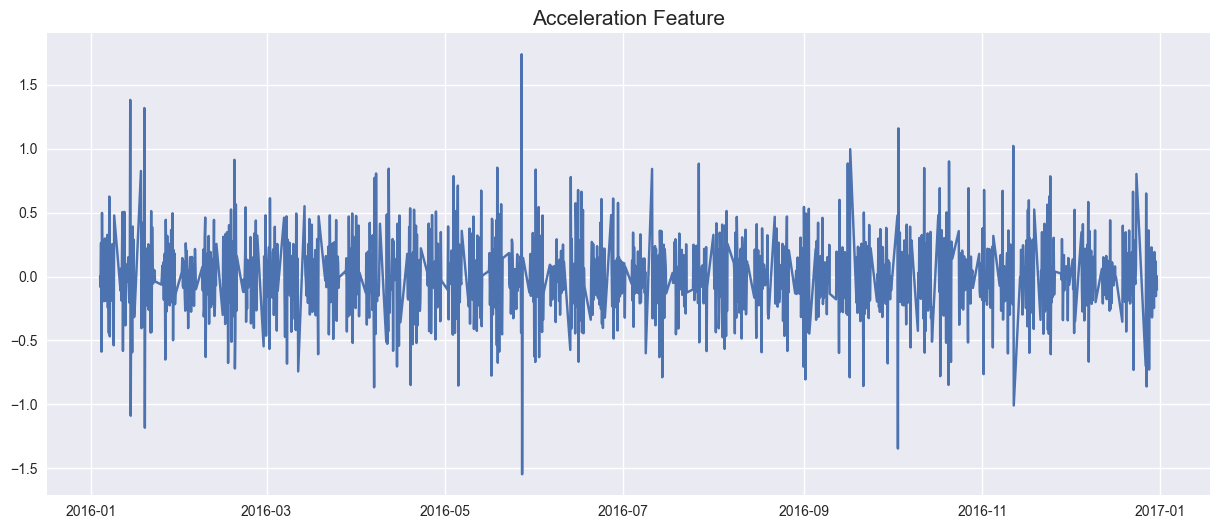

In [5]:
plt.figure(figsize=(15,6))
plt.plot(df["acceleration"])
plt.title("Acceleration Feature", size=15)
plt.show()

<br>

## **Logarithmic Percentage Change**

The `log_pct` function computes the **log return** over a specified window. Log returns are widely used in finance as they stabilize variance and make returns **time-additive**.

$$r_t  = \ln(P_t) - \ln(P_{t-n})$$

Where: $P_t$ is the price at time $t$ and $n$ is the window size.

In [6]:
df["log_pct"] = fe.math.log_pct(df=df, col="close", window_size=30)

df["log_pct"]

time
2016-01-04 00:00:00         NaN
2016-01-04 04:00:00         NaN
2016-01-04 08:00:00         NaN
2016-01-04 12:00:00         NaN
2016-01-04 16:00:00         NaN
                         ...   
2016-12-30 04:00:00    0.001161
2016-12-30 08:00:00    0.001422
2016-12-30 12:00:00    0.001643
2016-12-30 16:00:00    0.000484
2016-12-30 20:00:00    0.000646
Name: log_pct, Length: 1548, dtype: float64

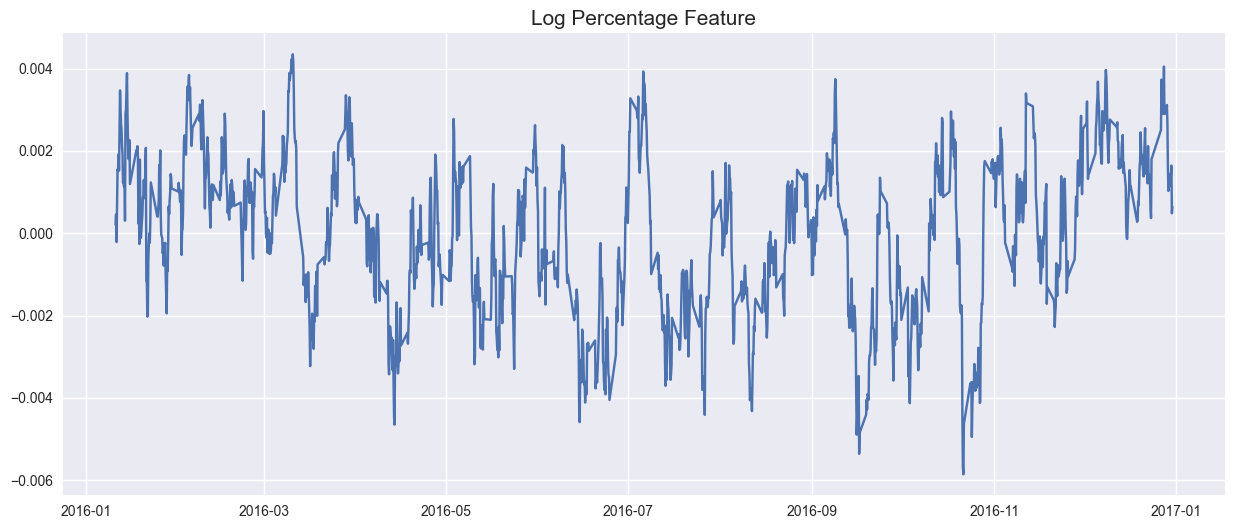

In [7]:
plt.figure(figsize=(15,6))
plt.plot(df["log_pct"])
plt.title("Log Percentage Feature", size=15)
plt.show()

<br>

## **Auto Correlation**

The `auto_corr` function computes the **rolling autocorrelation** of a given column over a specified window. Autocorrelation measures how strongly a time series value is related to its **past values** at a given lag. For now, we use the following method only (`Pearson`correlation)

$$
r_k = \frac{\sum_{t=1}^{N-k} (X_t - \bar{X})(X_{t+k} - \bar{X})}{\sum_{t=1}^{N} (X_t - \bar{X})^2}
$$

Where $X_t$ is the value at time $t$, $k$ is the lag,  $N$ is the rolling window size.


In [8]:
df["auto_corr"] = fe.math.auto_corr(df=df, col="close", window_size=50, lag=10)
df["auto_corr"]

time
2016-01-04 00:00:00         NaN
2016-01-04 04:00:00         NaN
2016-01-04 08:00:00         NaN
2016-01-04 12:00:00         NaN
2016-01-04 16:00:00         NaN
                         ...   
2016-12-30 04:00:00    0.454313
2016-12-30 08:00:00    0.425926
2016-12-30 12:00:00    0.388406
2016-12-30 16:00:00    0.342590
2016-12-30 20:00:00    0.284411
Name: auto_corr, Length: 1548, dtype: float64

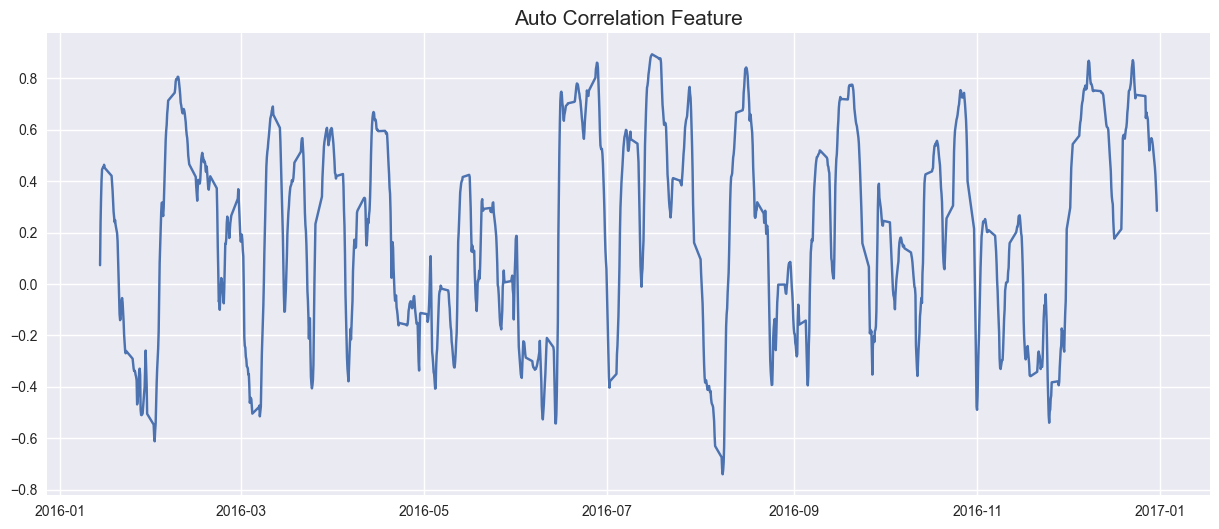

In [9]:
plt.figure(figsize=(15,6))
plt.plot(df["auto_corr"])
plt.title("Auto Correlation Feature", size=15)
plt.show()

<br>

## **Hurst**
The `hurst` function computes the **Hurst exponent** over a rolling window. The Hurst exponent is a **measure of long-term memory** in time series data, helping to classify a series as **mean-reverting, random, or trending**.


The Hurst exponent is estimated using **rescaled range analysis**:

$$
H = \frac{\log(R/S)}{\log(n)}
$$

Where $R$ is the range of the cumulative deviations, $S$ is the standard deviation, $n$ is the window size.

In [10]:
df["hurst"] = fe.math.hurst(df=df, col="close", window_size=200)
df["hurst"]

time
2016-01-04 00:00:00         NaN
2016-01-04 04:00:00         NaN
2016-01-04 08:00:00         NaN
2016-01-04 12:00:00         NaN
2016-01-04 16:00:00         NaN
                         ...   
2016-12-30 04:00:00    0.622430
2016-12-30 08:00:00    0.647859
2016-12-30 12:00:00    0.641063
2016-12-30 16:00:00    0.650008
2016-12-30 20:00:00    0.654192
Name: hurst, Length: 1548, dtype: float64

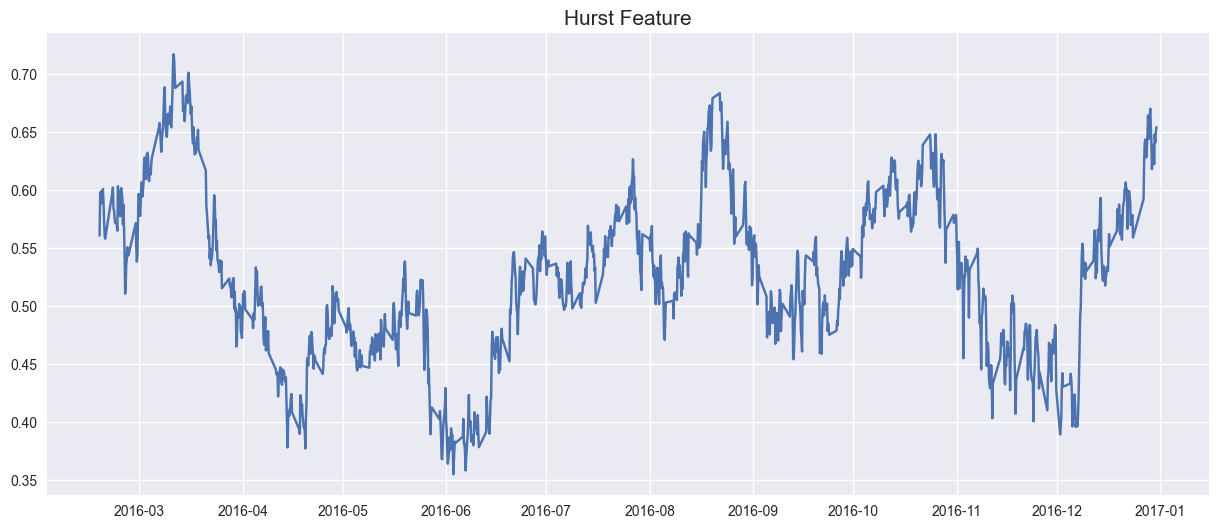

In [11]:
plt.figure(figsize=(15,6))
plt.plot(df["hurst"])
plt.title("Hurst Feature", size=15)
plt.show()

<br>

## **ADF test**  

The `adf_test` function measures **stationarity** in a time‑series via a rolling Augmented Dickey–Fuller test.  
Stationarity is crucial for many models (ARIMA, pairs‑trading, mean‑reversion signals). In Quantreo, ADF is **rolling**, each value tells you how stationary the *last N* observations are.

**Regression flavours**

| `regression` | Component(s) included | Typical use‑case |
|--------------|----------------------|------------------|
| `"c"`        | constant only        | detect stationarity around a *fixed mean* |
| `"ct"`       | constant + trend     | detect stationarity around a *linear trend* |

**Interpretation**

- **p‑value ≪ 0.05**  →  *Reject* the unit‑root null ⇒ series is **stationary** in that window.  
- **p‑value ≈ 1**     →  cannot reject null ⇒ behaves like a **random walk**.  
- Monitor the rolling statistic (*adf_stat*) to see how strongly the unit‑root hypothesis is rejected (more negative ⇒ stronger evidence of stationarity).

In [12]:
df["adf_stat"], df["adf_pvalue"] = fe.math.adf_test(df, col="close", window_size=80, lags=10, regression="ct")

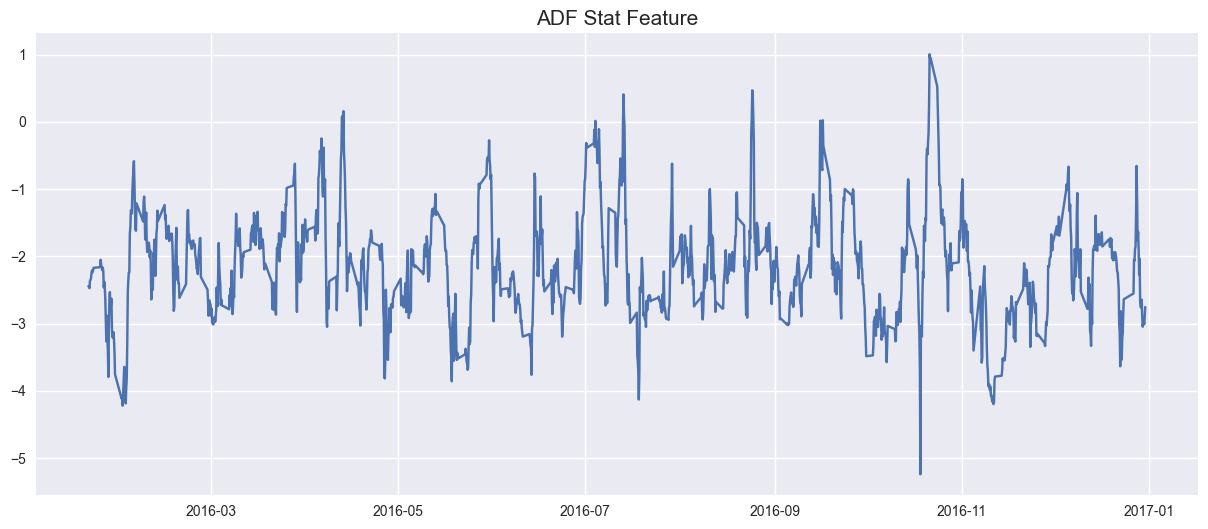

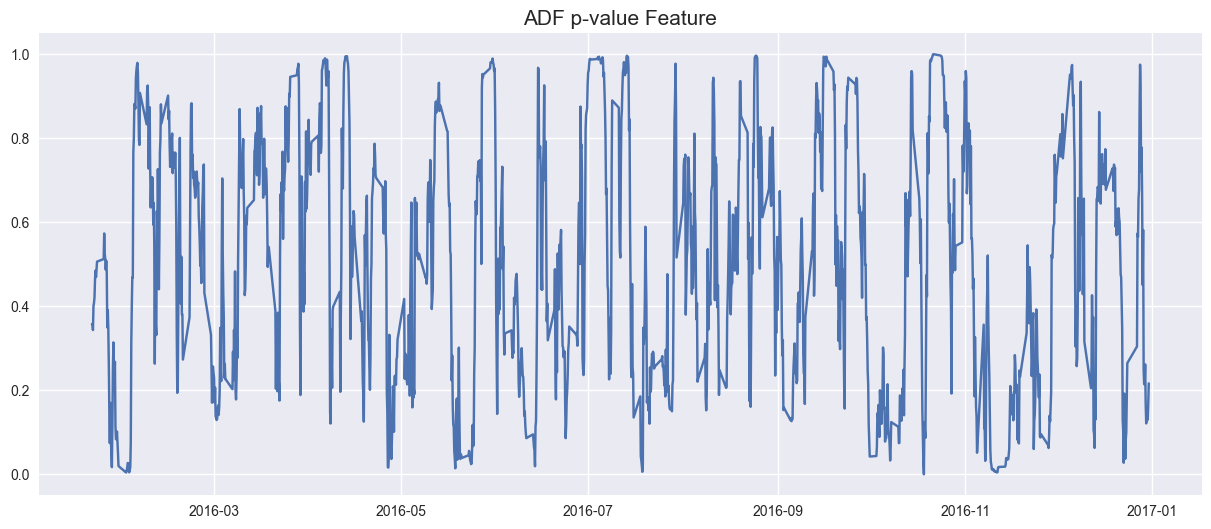

In [13]:
plt.figure(figsize=(15,6))
plt.plot(df["adf_stat"])
plt.title("ADF Stat Feature", size=15)
plt.show()

plt.figure(figsize=(15,6))
plt.plot(df["adf_pvalue"])
plt.title("ADF p-value Feature", size=15)
plt.show()

<br>

## ARCH Test

The `arch_test` function detects **conditional heteroskedasticity** — volatility clustering — by applying Engle’s ARCH Lagrange‑Multiplier test on a **rolling window**. In Quantreo, ARCH is **rolling**. Each value tells you the ARCH stat (or p-value) over the *last N* observations.

<br>


**Interpretation**

- **Low p‑value (< 0.05)** ⇒ Reject homoskedasticity ⇒ **volatility is clustered** in that window.  
- The raw `arch_stat` (LM) grows with the strength of clustering and with the window length.


In [14]:
df["returns"] = df["close"].pct_change(1)
df["arch_stat"], df["arch_pvalue"] = fe.math.arch_test(df, col="returns", window_size=60, lags=10)

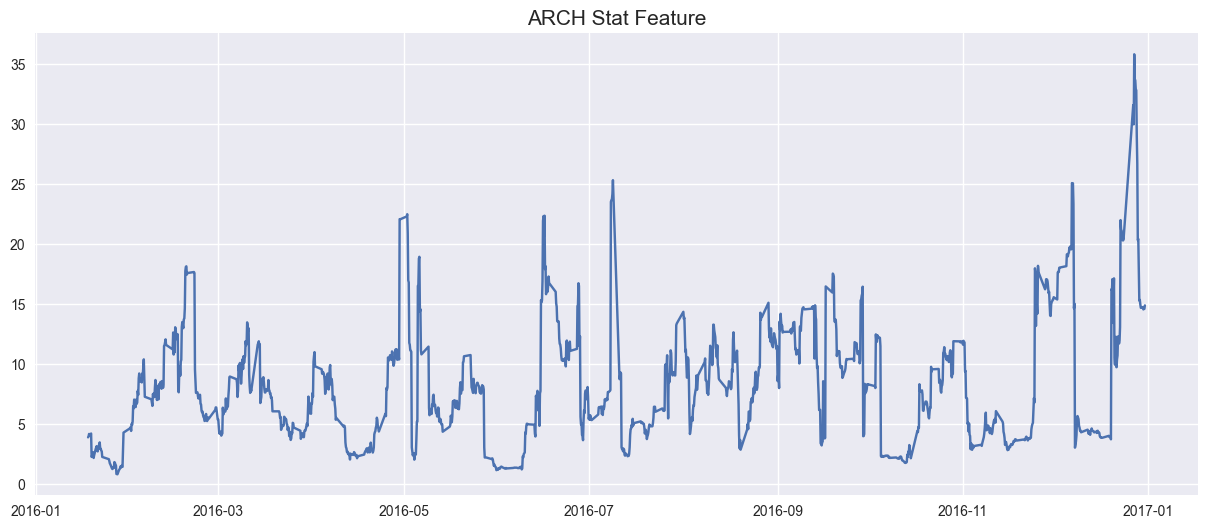

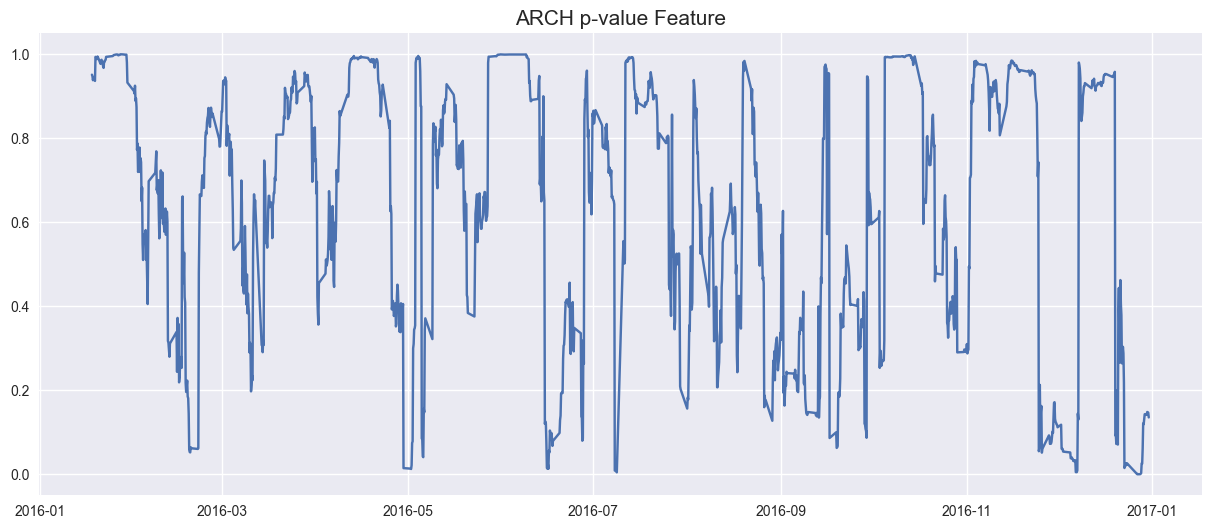

In [15]:
plt.figure(figsize=(15,6))
plt.plot(df["arch_stat"])
plt.title("ARCH Stat Feature", size=15)
plt.show()

plt.figure(figsize=(15,6))
plt.plot(df["arch_pvalue"])
plt.title("ARCH p-value Feature", size=15)
plt.show()

<br>

## Skewness

The `skewness` function captures **asymmetry** in the return distribution over a rolling window.  
Skewness is useful for detecting *tail‑risk*: strong negative skew hints at infrequent but severe losses, while positive skew indicates the potential for rare large gains.

<br>

**Quick interpretation**
- **Positive skew (`> 0`)**: Long right tail. Indicates occasional outsized gains or extreme positive returns.
- **Symmetric (`≈ 0`)**: Balanced distribution. Behavior close to Gaussian, no major bias in direction.
- **Negative skew (`< 0`)**: Long left tail. Indicates crash-prone dynamics or fat left tail (extreme losses).

In [16]:
df["returns"] = df["close"].pct_change(1)
df["skew"] = fe.math.skewness(df=df, col="returns", window_size=60)
df["skew"]

time
2016-01-04 00:00:00         NaN
2016-01-04 04:00:00         NaN
2016-01-04 08:00:00         NaN
2016-01-04 12:00:00         NaN
2016-01-04 16:00:00         NaN
                         ...   
2016-12-30 04:00:00    1.613339
2016-12-30 08:00:00    1.599441
2016-12-30 12:00:00    1.601330
2016-12-30 16:00:00    1.616079
2016-12-30 20:00:00    1.619147
Name: skew, Length: 1548, dtype: float64

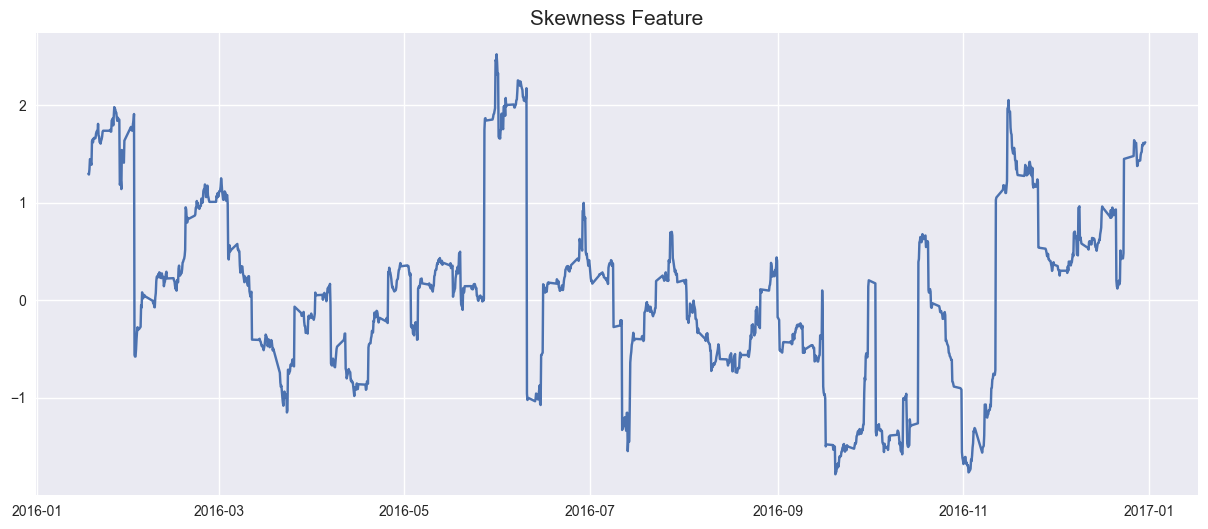

In [17]:
plt.figure(figsize=(15,6))
plt.plot(df["skew"])
plt.title("Skewness Feature", size=15)
plt.show()

<br>

## **Kurtosis**

The `kurtosis` function tracks **tail heaviness** in returns over a rolling window.  
High kurtosis warns of extreme moves (fat tails); low kurtosis indicates a thinner‑tailed, more Gaussian‑like distribution.

<br>

**Quick interpretation**

- **High kurtosis (`> 3`)**: Fat tails.Large shocks are more likely (extreme returns, volatility clustering).
- **Normal kurtosis (`≈ 3`)**: Gaussian (normal distribution). Standard volatility, typical behavior.
- **Low kurtosis (`< 3`)**: Light tails. Less prone to outliers or sharp price changes.

In [18]:
df["returns"] = df["close"].pct_change(1)
df["kurt"] = fe.math.kurtosis(df=df, col="returns", window_size=60)
df["kurt"]

time
2016-01-04 00:00:00         NaN
2016-01-04 04:00:00         NaN
2016-01-04 08:00:00         NaN
2016-01-04 12:00:00         NaN
2016-01-04 16:00:00         NaN
                         ...   
2016-12-30 04:00:00    3.875435
2016-12-30 08:00:00    3.910763
2016-12-30 12:00:00    3.879435
2016-12-30 16:00:00    3.873371
2016-12-30 20:00:00    3.796810
Name: kurt, Length: 1548, dtype: float64

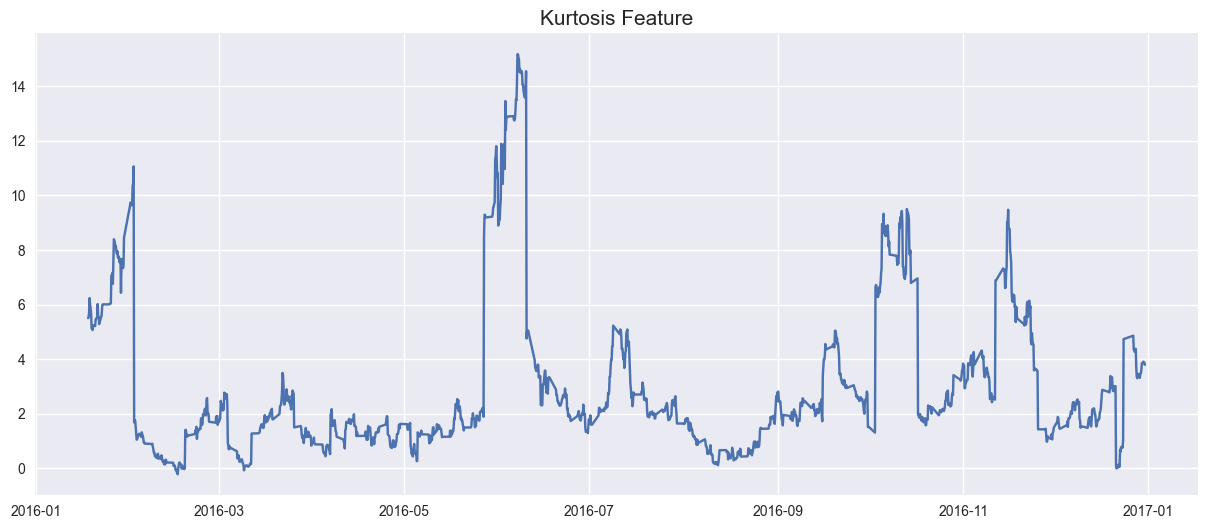

In [19]:
plt.figure(figsize=(15,6))
plt.plot(df["kurt"])
plt.title("Kurtosis Feature", size=15)
plt.show()

<br>

## Sample Entropy

Compute the rolling Sample Entropy of a time series column. Sample Entropy is a non-linear measure of irregularity or unpredictability in a signal.  
It helps detect transitions between more structured and more chaotic market conditions.


**Interpretation**:
- A higher Sample Entropy value indicates a more irregular, unpredictable, and chaotic time series.
- A Lower values suggest more structured or repetitive patterns in the data.


In [26]:
df["sample_entropy"] = fe.math.sample_entropy(df=df, col="close", window_size=60, order=3)
df["sample_entropy"]

time
2016-01-04 00:00:00         NaN
2016-01-04 04:00:00         NaN
2016-01-04 08:00:00         NaN
2016-01-04 12:00:00         NaN
2016-01-04 16:00:00         NaN
                         ...   
2016-12-30 04:00:00    0.711496
2016-12-30 08:00:00    0.796331
2016-12-30 12:00:00    0.826679
2016-12-30 16:00:00    0.862224
2016-12-30 20:00:00    0.893818
Name: sample_entropy, Length: 1548, dtype: float64

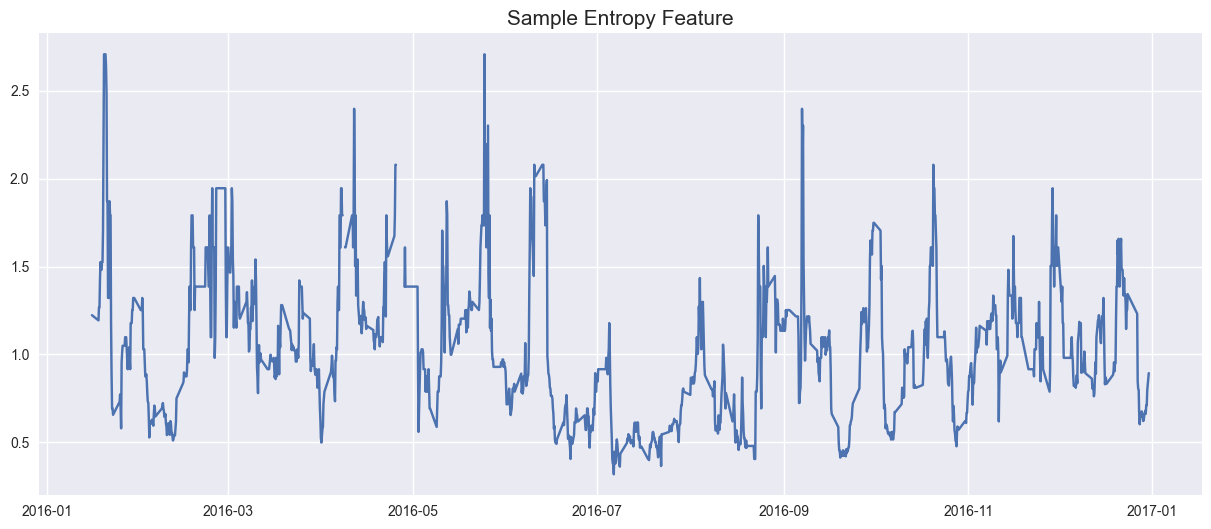

In [27]:
plt.figure(figsize=(15,6))
plt.plot(df["sample_entropy"])
plt.title("Sample Entropy Feature", size=15)
plt.show()

<br>

## Spectral Entropy

Compute the rolling Spectral Entropy of a time series column.  
Spectral Entropy is a frequency-domain measure that quantifies how the power of a signal is distributed across frequency components.  
It helps detect whether a signal is highly structured (low entropy) or spread across many frequencies (high entropy).

**Interpretation**: 

- A **high spectral entropy** means the signal's energy is spread across many frequencies → more chaotic and less structured.  
- A **low value** suggests the signal is concentrated in a few frequencies → more regular or predictable.


In [32]:
df["spectral_entropy"] = fe.math.spectral_entropy(df=df, col="close", window_size=60)
df["spectral_entropy"]

time
2016-01-04 00:00:00         NaN
2016-01-04 04:00:00         NaN
2016-01-04 08:00:00         NaN
2016-01-04 12:00:00         NaN
2016-01-04 16:00:00         NaN
                         ...   
2016-12-30 04:00:00    0.602758
2016-12-30 08:00:00    0.612430
2016-12-30 12:00:00    0.617316
2016-12-30 16:00:00    0.613878
2016-12-30 20:00:00    0.608332
Name: spectral_entropy, Length: 1548, dtype: float64

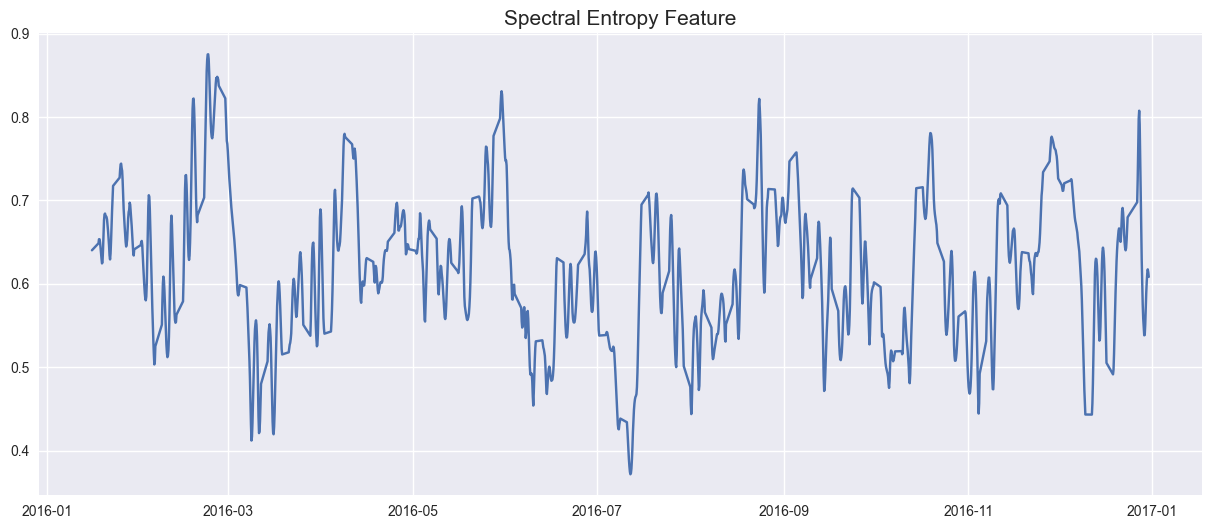

In [33]:
plt.figure(figsize=(15,6))
plt.plot(df["spectral_entropy"])
plt.title("Spectral Entropy Feature", size=15)
plt.show()

<br>

## Permutation Entropy

Compute the rolling Permutation Entropy of a time series column.  
Permutation Entropy is a non-linear complexity measure based on the order relationships between time series values.  
It is particularly effective at detecting subtle structural changes or dynamic regime shifts in financial data.


**Interpretation**:

- A **high permutation entropy** means that the ordering of values is highly irregular and chaotic.
- A **low value** indicates more structured or repeated patterns in the signal.


In [36]:
df["permutation_entropy"] = fe.math.permutation_entropy(df=df, col="close", window_size=60, order=5)
df["permutation_entropy"]

time
2016-01-04 00:00:00         NaN
2016-01-04 04:00:00         NaN
2016-01-04 08:00:00         NaN
2016-01-04 12:00:00         NaN
2016-01-04 16:00:00         NaN
                         ...   
2016-12-30 04:00:00    0.757130
2016-12-30 08:00:00    0.757130
2016-12-30 12:00:00    0.757130
2016-12-30 16:00:00    0.755179
2016-12-30 20:00:00    0.753227
Name: permutation_entropy, Length: 1548, dtype: float64

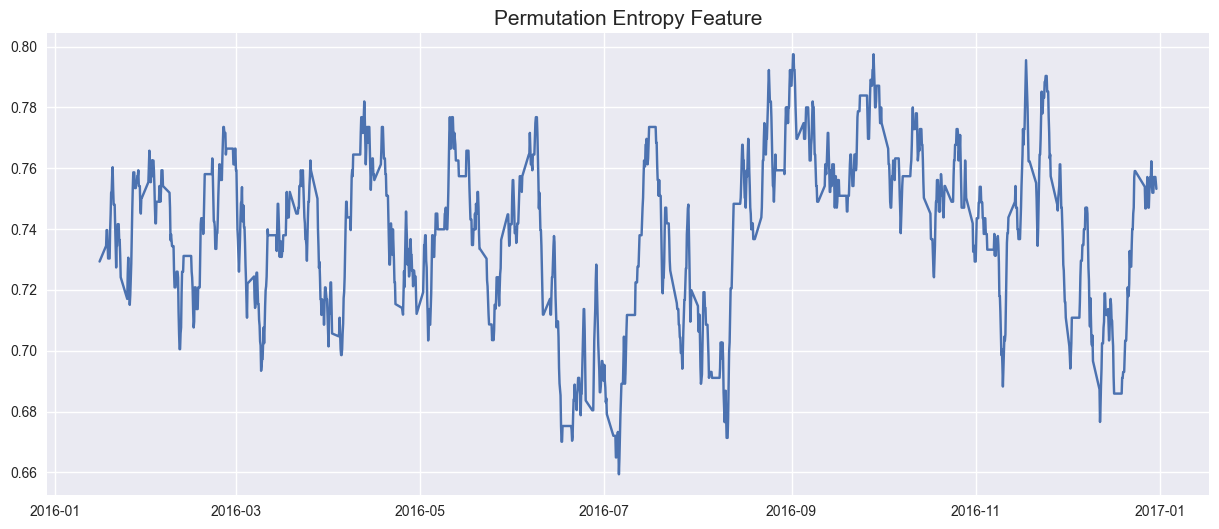

In [37]:
plt.figure(figsize=(15,6))
plt.plot(df["permutation_entropy"])
plt.title("Permutation Entropy Feature", size=15)
plt.show()

<br>

## Detrended Fluctuation

Compute the rolling Detrended Fluctuation Analysis (DFA) exponent of a time series column.  
DFA is a fractal analysis method that quantifies long-term memory and self-similarity in a signal.  
It is useful for detecting **persistence** (trend-following behavior) or **anti-persistence** (mean-reversion behavior) in financial regimes.


**Interpretation**:

- **DFA ≈ 0.5** → random walk (white noise)  
- **DFA > 0.5** → persistent behavior (trend continuation)  
- **DFA < 0.5** → anti-persistent behavior (mean-reversion)

In [5]:
df["detrended_fluctuation"] = fe.math.detrended_fluctuation(df=df, col="close", window_size=100)
df["detrended_fluctuation"]

time
2016-01-04 00:00:00         NaN
2016-01-04 04:00:00         NaN
2016-01-04 08:00:00         NaN
2016-01-04 12:00:00         NaN
2016-01-04 16:00:00         NaN
                         ...   
2016-12-30 04:00:00    1.348993
2016-12-30 08:00:00    1.303145
2016-12-30 12:00:00    1.582301
2016-12-30 16:00:00    1.922450
2016-12-30 20:00:00    2.046903
Name: detrended_fluctuation, Length: 1548, dtype: float64

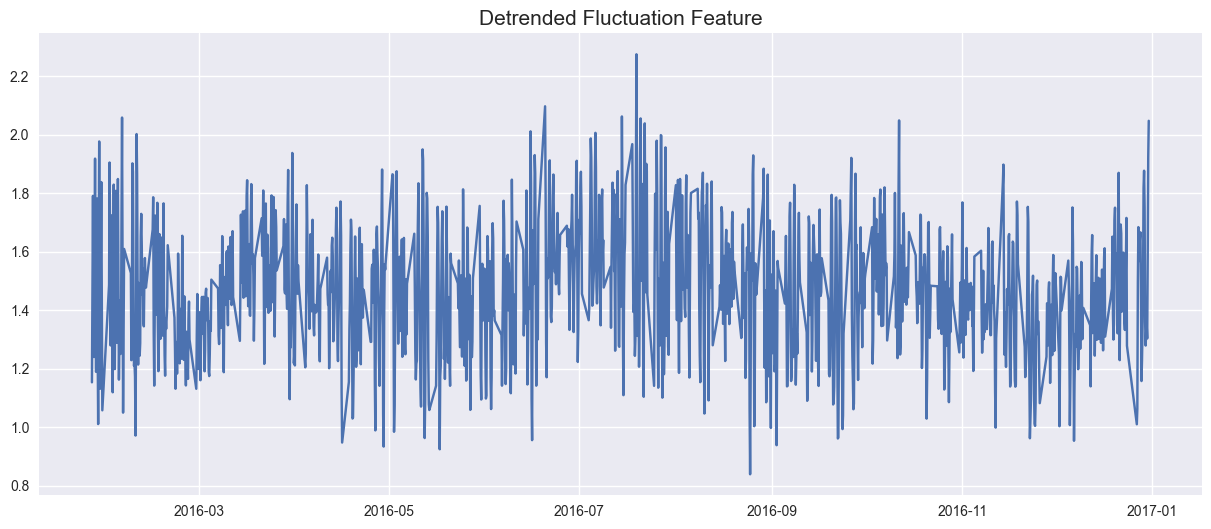

In [6]:
plt.figure(figsize=(15,6))
plt.plot(df["detrended_fluctuation"])
plt.title("Detrended Fluctuation Feature", size=15)
plt.show()

<br>

## Petrosian FD

Compute the rolling Petrosian Fractal Dimension of a time series column. Petrosian FD estimates the structural complexity of a signal by measuring directional changes.  
It is fast to compute and useful for capturing signal regularity.

**Interpretation** - In most practical applications (financial time series or EEG signals), typical PFD values fall within these ranges:

- **1.00–1.05** → very regular signal (quasi-linear or simple structure)  
- **1.05–1.10** → moderately irregular signal (structured noise, moderate volatility)  
- **1.10+** → highly irregular signal, high-frequency noise, or chaotic behavior

In [7]:
df["petrosian_fd"] = fe.math.petrosian_fd(df=df, col="close", window_size=100)
df["petrosian_fd"]

time
2016-01-04 00:00:00         NaN
2016-01-04 04:00:00         NaN
2016-01-04 08:00:00         NaN
2016-01-04 12:00:00         NaN
2016-01-04 16:00:00         NaN
                         ...   
2016-12-30 04:00:00    1.038072
2016-12-30 08:00:00    1.038072
2016-12-30 12:00:00    1.038862
2016-12-30 16:00:00    1.038862
2016-12-30 20:00:00    1.038072
Name: petrosian_fd, Length: 1548, dtype: float64

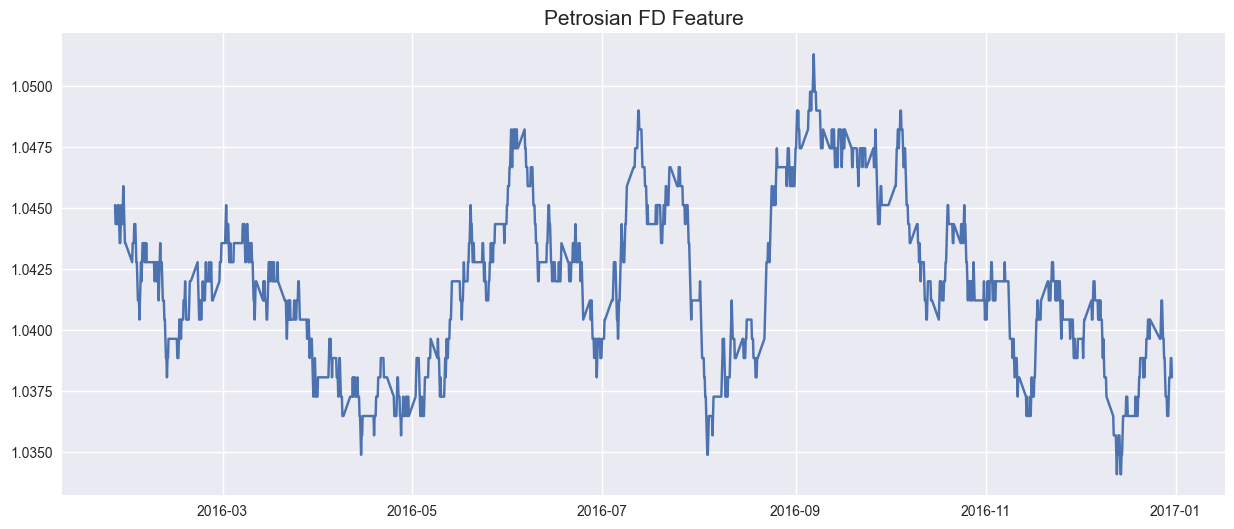

In [8]:
plt.figure(figsize=(15,6))
plt.plot(df["petrosian_fd"])
plt.title("Petrosian FD Feature", size=15)
plt.show()

<br>

## Tail Index

Compute the rolling tail index (α̂) using the Hill estimator (without the +1 bias correction) on the **right tail** of a strictly positive time series.

This method captures the **heaviness of the tail distribution**:  
lower values of α indicate fatter tails (more probability of extreme events),  
while higher α implies a thinner tail and less extreme behavior.


**Important**: This estimator works **only** on strictly positive values.  
You must pre-process your series (e.g., `abs(returns)` or `-returns[returns < 0]`) depending on the tail you want to study.

<br>

**Interpretation**:

- **α̂ < 2** → Very heavy-tailed distribution → Extreme moves likely  
- **α̂ ≈ 3** → Comparable to a t-distribution (df=3) → High volatility, finite variance  
- **α̂ > 4** → Thinner tails → Lower probability of rare events

In [5]:
df["abs_returns"] = np.abs(df["returns"])
df["tail_index"] = fe.math.tail_index(df=df, col="abs_returns", window_size=150, k_ratio=0.10)
df["tail_index"]

time
2016-01-04 00:00:00         NaN
2016-01-04 04:00:00         NaN
2016-01-04 08:00:00         NaN
2016-01-04 12:00:00         NaN
2016-01-04 16:00:00         NaN
                         ...   
2016-12-30 04:00:00    2.108685
2016-12-30 08:00:00    2.238423
2016-12-30 12:00:00    2.238423
2016-12-30 16:00:00    2.238423
2016-12-30 20:00:00    2.484552
Name: tail_index, Length: 1548, dtype: float64

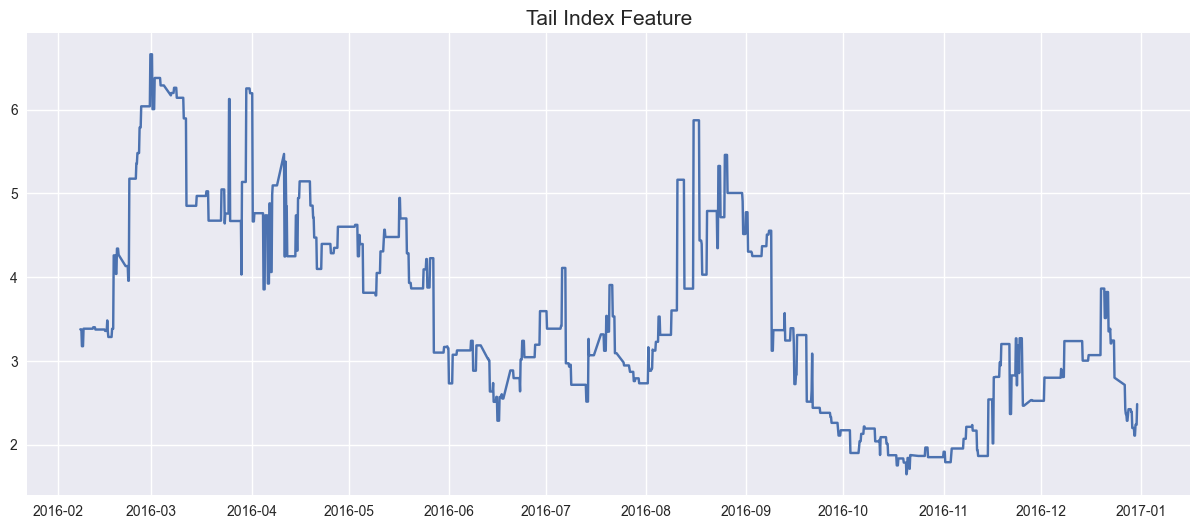

In [6]:
plt.figure(figsize=(15,6))
plt.plot(df["tail_index"])
plt.title("Tail Index Feature", size=15)
plt.show()

<br>

## Shapiro Wilk

Applies the Shapiro-Wilk test on a time series using a rolling window to evaluate the local normality of a specified column.

This test detects deviations from normality by capturing both skewness and kurtosis. It is especially useful for identifying statistical regime changes in financial return series.

<br>

**Interpretation**

- **p-value < 0.05** → Reject H₀: the distribution is **not normal**  
- **p-value ≥ 0.05** → Fail to reject H₀: the distribution **may be normal**  

In [7]:
df["sw_stat"], df["sw_pvalue"] = fe.math.shapiro_wilk(df, col="returns", window_size=60)

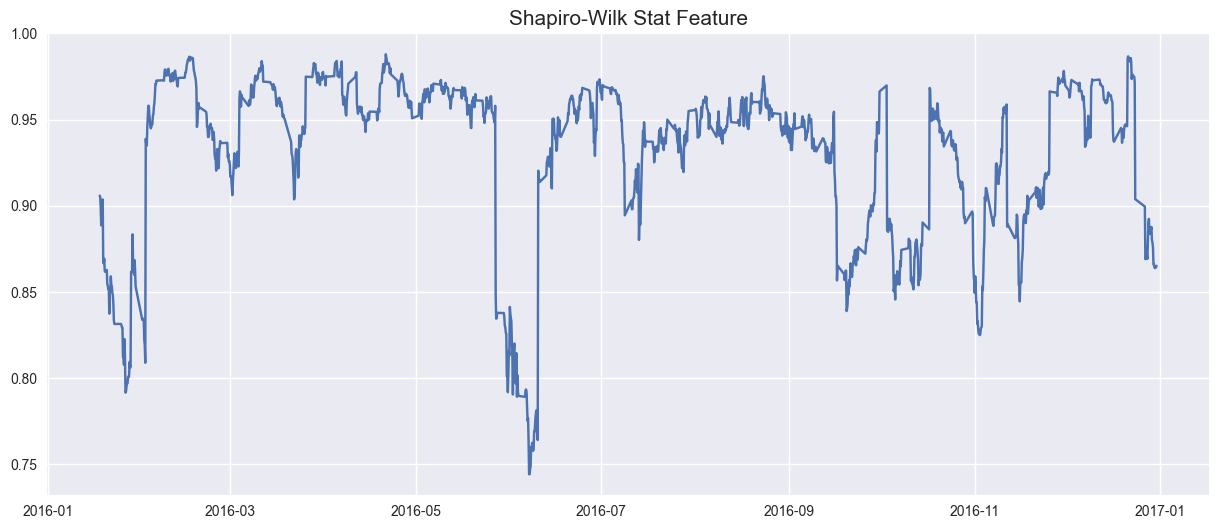

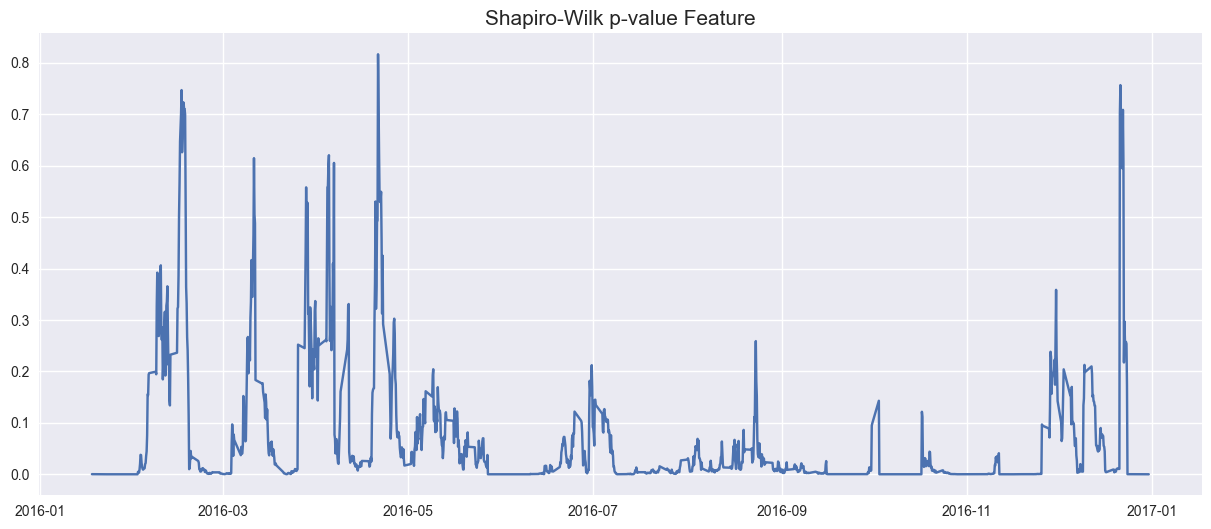

In [8]:
plt.figure(figsize=(15,6))
plt.plot(df["sw_stat"])
plt.title("Shapiro-Wilk Stat Feature", size=15)
plt.show()

plt.figure(figsize=(15,6))
plt.plot(df["sw_pvalue"])
plt.title("Shapiro-Wilk p-value Feature", size=15)
plt.show()

<br>

## **Bimodality Coefficient**

The `bimodality_coefficient` function computes the **Bimodality Coefficient (BC)**, a statistical measure used to detect whether a distribution is **unimodal** (single regime) or **bimodal/multimodal** (multiple regimes).

It combines **skewness (γ)** and **kurtosis (κ)** into a single rolling indicator.
A BC greater than **0.55** typically indicates the presence of bimodality or regime-switching behavior.

The formula is:

$$
BC = \frac{γ^2 + 1}{κ + \frac{3(n-1)^2}{(n-2)(n-3)}}
$$

- $γ$ = skewness
- $κ$ = excess kurtosis (Pandas convention: Normal = 0)
- $n$ = rolling window size


In [3]:
df["returns"] = df["close"].pct_change(1)
df["bimodalty"] = fe.math.bimodality_coefficient(df, col="returns", window_size=250)
df["bimodalty"]

time
2016-01-04 00:00:00         NaN
2016-01-04 04:00:00         NaN
2016-01-04 08:00:00         NaN
2016-01-04 12:00:00         NaN
2016-01-04 16:00:00         NaN
                         ...   
2016-12-30 04:00:00    0.266345
2016-12-30 08:00:00    0.266075
2016-12-30 12:00:00    0.268179
2016-12-30 16:00:00    0.267817
2016-12-30 20:00:00    0.270432
Name: bimodalty, Length: 1548, dtype: float64

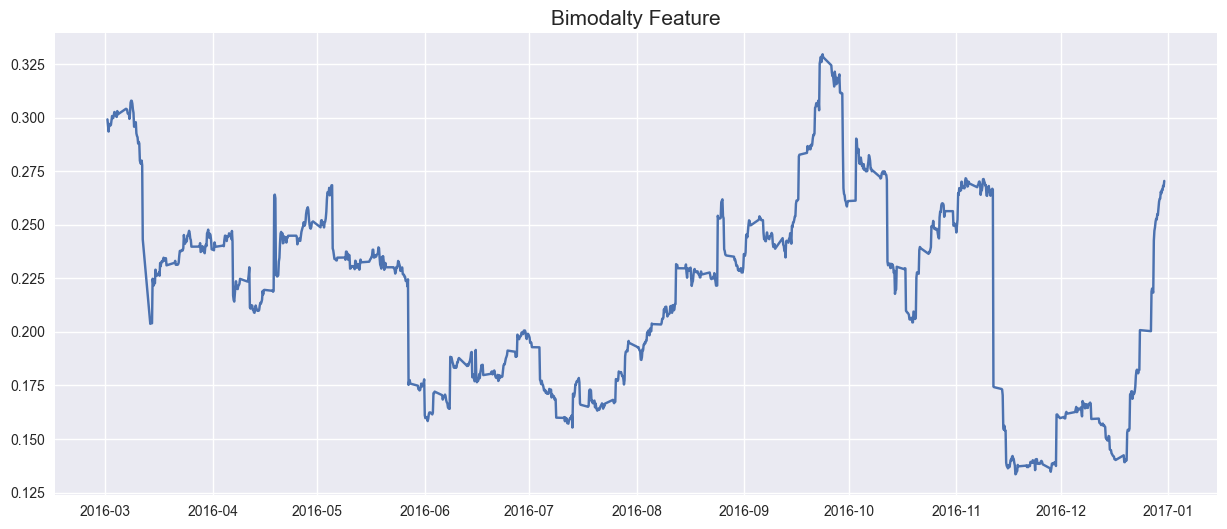

In [4]:
plt.figure(figsize=(15,6))
plt.plot(df["bimodalty"])
plt.title("Bimodalty Feature", size=15)
plt.show()